<a href="https://colab.research.google.com/github/RichardRajesh/5731-Computational-methods/blob/main/Rajesh_Bodas_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import csv

def CSV_Reading(file_operations_details):
    """
    Reads the CSV file and returns the content as a list of review texts.
    """
    review_text_individuality = []
    with open(file_operations_details, 'r', encoding='utf-8') as Iterating_Rows_records:
        csv_reader = csv.reader(Iterating_Rows_records)
        next(csv_reader)  # Skip header
        for rows_records in csv_reader:
            review_text_individuality.append(rows_records[3])  # Assuming review text is in the fourth column
    return review_text_individuality


def All_Generated_Ngrams(review_text_individuality, N):
    """
    Generates n-grams from the given text.
    """
    words_extracted = review_text_individuality.split()  # Split the review into individual words
    all_generated_ngrams = []
    for words_iterating in range(len(words_extracted) - N + 1):
        all_generated_ngrams.append(' '.join(words_extracted[words_iterating:words_iterating+N]))
    return all_generated_ngrams


def Individual_Ngram_data(reviews, N):
    """
    Counts the frequency of all the N-grams (N = n).
    """
    individual_ngram_data = {}
    for review in reviews:
        review_ngrams = All_Generated_Ngrams(review, N)
        for ngram_data in review_ngrams:
            if ngram_data in individual_ngram_data:
                individual_ngram_data[ngram_data] += 1
            else:
                individual_ngram_data[ngram_data] = 1
    return individual_ngram_data



def main():
    # Change the File Operations details to the correct file path in Google Colab
    file_operations_details = '/content/sample_data/cleaned_movie_reviews.csv'
    # Read the CSV file
    Extracted_Reviews_from_website = CSV_Reading(file_operations_details)
    # Set the value of N for N-grams
    N = 3
    # Count the frequency of all the N-grams
    N_gram_Counts_total = Individual_Ngram_data(Extracted_Reviews_from_website, N)
    # Print the results
    print(f"Frequency of {N}-grams:")
    for ngram, count in N_gram_Counts_total.items():
        print(f"{ngram}: {count}")

if __name__ == "__main__":
    main()




Frequency of 3-grams:
godzilla minu one: 560
minu one ryunosuk: 40
one ryunosuk kamiki: 40
ryunosuk kamiki minami: 40
kamiki minami hamab: 40
minami hamab sakura: 40
hamab sakura ando: 40
sakura ando yuki: 40
ando yuki yamada: 40
yuki yamada kuranosuk: 40
yamada kuranosuk sasak: 40
kuranosuk sasak hidetaka: 40
sasak hidetaka yaoshioka: 40
hidetaka yaoshioka yuya: 40
yaoshioka yuya endo: 40
yuya endo saki: 40
endo saki nakatani: 40
saki nakatani director: 40
nakatani director takashi: 40
director takashi yamazaki: 80
takashi yamazaki herculean: 40
yamazaki herculean effort: 40
herculean effort reviv: 40
effort reviv kaiju: 40
reviv kaiju franchis: 40
kaiju franchis effortlessli: 40
franchis effortlessli awesom: 40
effortlessli awesom absolut: 40
awesom absolut toptier: 40
absolut toptier filmmak: 40
toptier filmmak origin: 40
filmmak origin stori: 40
origin stori gigant: 40
stori gigant monster: 40
gigant monster show: 40
monster show shore: 40
show shore post: 40
shore post wwii: 40
po

In [ ]:
import pandas as pd
from collections import Counter

# Load the dataset
df = pd.read_csv('/content/sample_data/cleaned_movie_reviews.csv')

# Tokenize the text into individual words
individual_words_extracted_from_clean_text_column = ' '.join(df['Clean Text']).split()

# Generate bigrams
generated_word_pairs = [(individual_words_extracted_from_clean_text_column[i], individual_words_extracted_from_clean_text_column[i+1]) for i in range(len(individual_words_extracted_from_clean_text_column)-1)]

# Count occurrences of each bigram
count_of_each_word_pair = Counter(generated_word_pairs)

# Calculate probabilities for each bigram
probability_of_each_word_pair = {}
for current_word_pair, count in count_of_each_word_pair.items():
    w2, w1 = current_word_pair
    probability_of_each_word_pair[current_word_pair] = count / individual_words_extracted_from_clean_text_column.count(w2)

# Print the probabilities
for current_word_pair, calculated_probability in probability_of_each_word_pair.items():
    print(f"Probability of {current_word_pair}: {calculated_probability:.2f}")



Probability of ('godzilla', 'minu'): 0.10
Probability of ('minu', 'one'): 0.96
Probability of ('one', 'ryunosuk'): 0.02
Probability of ('ryunosuk', 'kamiki'): 1.00
Probability of ('kamiki', 'minami'): 0.25
Probability of ('minami', 'hamab'): 1.00
Probability of ('hamab', 'sakura'): 0.33
Probability of ('sakura', 'ando'): 1.00
Probability of ('ando', 'yuki'): 1.00
Probability of ('yuki', 'yamada'): 1.00
Probability of ('yamada', 'kuranosuk'): 1.00
Probability of ('kuranosuk', 'sasak'): 1.00
Probability of ('sasak', 'hidetaka'): 1.00
Probability of ('hidetaka', 'yaoshioka'): 1.00
Probability of ('yaoshioka', 'yuya'): 1.00
Probability of ('yuya', 'endo'): 1.00
Probability of ('endo', 'saki'): 1.00
Probability of ('saki', 'nakatani'): 1.00
Probability of ('nakatani', 'director'): 1.00
Probability of ('director', 'takashi'): 0.75
Probability of ('takashi', 'yamazaki'): 0.80
Probability of ('yamazaki', 'herculean'): 0.10
Probability of ('herculean', 'effort'): 1.00
Probability of ('effort', 

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [ ]:
import pandas as pd
from textblob import TextBlob as NaturalLanguageProcessingTextBlob
from collections import Counter as ElementCounter

# Load the dataset
df = pd.read_csv('/content/sample_data/cleaned_movie_reviews.csv')

# Tokenize each review into words
words_tokenized_reviews = [NaturalLanguageProcessingTextBlob(review).words for review in df['Clean Text']]

# Extract all noun phrases from the dataset
extracted_noun_phrases_from_reviews = []
for current_tokenized_review in words_tokenized_reviews:
    text_blob_instance_for_review = NaturalLanguageProcessingTextBlob(' '.join(current_tokenized_review))
    extracted_noun_phrases_from_reviews.extend(text_blob_instance_for_review.noun_phrases)

# Calculate the frequency of each noun phrase in the entire dataset
occurrences_of_each_noun_phrase = ElementCounter(extracted_noun_phrases_from_reviews)

# Calculate the maximum frequency of any noun phrase in the entire dataset
maximum_frequency_of_any_noun_phrase = max(occurrences_of_each_noun_phrase.values())

# Initialize a list to store the relative probabilities for each review
calculated_relative_probabilities_for_each_review = []

# Calculate the relative probabilities of each review
for current_tokenized_review in words_tokenized_reviews:
    # Calculate the frequency of each noun phrase in the review
    occurrences_of_each_noun_phrase_in_review = ElementCounter(NaturalLanguageProcessingTextBlob(' '.join(current_tokenized_review)).noun_phrases)
    # Calculate the relative probability for each noun phrase in the review
    calculated_relative_probabilities_for_each_review.append({phrase: occurrences_of_each_noun_phrase_in_review[phrase] / maximum_frequency_of_any_noun_phrase for phrase in occurrences_of_each_noun_phrase_in_review})

# Create a DataFrame to store the results
dataframe_to_store_results = pd.DataFrame(calculated_relative_probabilities_for_each_review)

# Replace NaN values with 0
dataframe_to_store_results.fillna(0, inplace=True)

# Rename the index to represent the review number
dataframe_to_store_results.index = [f'Review-{i+1}' for i in range(len(words_tokenized_reviews))]

# Print the results table
print(dataframe_to_store_results)



             godzilla minu  \
Review-1          0.003571   
Review-2          0.000000   
Review-3          0.000000   
Review-4          0.000000   
Review-5          0.000000   
...                    ...   
Review-996        0.000000   
Review-997        0.000000   
Review-998        0.000000   
Review-999        0.000000   
Review-1000       0.000000   

             ryunosuk kamiki minami hamab sakura ando yuki yamada kuranosuk sasak hidetaka yaoshioka yuya endo saki nakatani director takashi yamazaki herculean effort reviv kaiju franchis effortlessli awesom absolut toptier filmmak origin stori gigant monster show shore post wwii japan engag fulltilt invas tokyo environ atyp destruct death key film strength plot involv exkamikaz pilot kamiki suffer arguabl cinema poignant ptsd  \
Review-1                                              0.003571                                                                                                                                              

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Write your code here

#installing selenium package
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [802 kB]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,081 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://archive.ubuntu.com/ub

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
import pandas as pd
import numpy as np
import math

# Read the dataset
df = pd.read_csv('/content/sample_data/cleaned_movie_reviews.csv')

# Tokenize the documents
tokenized_documents = [document.split() for document in df['Clean Text']]

# Compute TF (Term Frequency)
def calculate_term_frequency(document):
    term_frequency_document = {}
    total_terms_in_document = len(document)
    for term in set(document):
        term_frequency_document[term] = document.count(term) / total_terms_in_document
    return term_frequency_document

# Compute IDF (Inverse Document Frequency)
def calculate_inverse_document_frequency(documents):
    inverse_document_frequency = {}
    total_number_of_documents = len(documents)
    all_unique_terms_across_documents = set([term for document in documents for term in document])
    for term in all_unique_terms_across_documents:
        documents_with_term = sum([1 for document in documents if term in document])
        inverse_document_frequency[term] = math.log(total_number_of_documents / (1 + documents_with_term))
    return inverse_document_frequency

# Compute TF-IDF
def calculate_term_frequency_inverse_document_frequency(term_frequency, inverse_document_frequency):
    term_frequency_inverse_document_frequency = {}
    for term, tf_value in term_frequency.items():
        term_frequency_inverse_document_frequency[term] = tf_value * inverse_document_frequency[term]
    return term_frequency_inverse_document_frequency

# Compute TF-IDF matrix
term_frequency_inverse_document_frequency_matrix = []
all_unique_terms_across_documents = set([term for document in tokenized_documents for term in document])
inverse_document_frequency = calculate_inverse_document_frequency(tokenized_documents)
for i, document in enumerate(tokenized_documents):
    term_frequency = calculate_term_frequency(document)
    term_frequency_inverse_document_frequency_vector = [term_frequency.get(term, 0) * inverse_document_frequency[term] for term in all_unique_terms_across_documents]
    term_frequency_inverse_document_frequency_matrix.append(term_frequency_inverse_document_frequency_vector)

# Convert TF-IDF matrix to DataFrame
term_frequency_inverse_document_frequency_dataframe = pd.DataFrame(term_frequency_inverse_document_frequency_matrix, columns=sorted(all_unique_terms_across_documents))
term_frequency_inverse_document_frequency_dataframe.index.name = 'token'
term_frequency_inverse_document_frequency_dataframe.reset_index(inplace=True)

# Print the TF-IDF matrix DataFrame
print(term_frequency_inverse_document_frequency_dataframe)



     token  abid  abil     abl    abomin  aboutth  absolut   abstain  academi  \
0        0   0.0   0.0  0.0000  0.000000      0.0      0.0  0.000000      0.0   
1        1   0.0   0.0  0.0000  0.008703      0.0      0.0  0.000000      0.0   
2        2   0.0   0.0  0.0000  0.000000      0.0      0.0  0.007626      0.0   
3        3   0.0   0.0  0.0000  0.000000      0.0      0.0  0.000000      0.0   
4        4   0.0   0.0  0.0000  0.000000      0.0      0.0  0.000000      0.0   
..     ...   ...   ...     ...       ...      ...      ...       ...      ...   
995    995   0.0   0.0  0.0000  0.000000      0.0      0.0  0.010056      0.0   
996    996   0.0   0.0  0.0165  0.000000      0.0      0.0  0.000000      0.0   
997    997   0.0   0.0  0.0000  0.000000      0.0      0.0  0.000000      0.0   
998    998   0.0   0.0  0.0000  0.000000      0.0      0.0  0.000000      0.0   
999    999   0.0   0.0  0.0000  0.000000      0.0      0.0  0.000000      0.0   

     accomplish  ...  yaosh

In [ ]:
import pandas as pd
import math

# Read the dataset
df = pd.read_csv('/content/sample_data/cleaned_movie_reviews.csv')

# Sample query
query = "An Outstanding movie with a haunting performance and best character development"

# Preprocess the query
query = query.lower()
individual_terms_extracted_from_query = query.split()

# Tokenize and preprocess the documents
def preprocess_individual_document(document):
    document = document.lower()
    return document.split()

# Compute term frequency (TF) for a document
def calculate_term_frequency(document):
    term_frequency = {}
    total_number_of_terms_in_document = len(document)
    for individual_term_in_document in set(document):
        term_frequency[individual_term_in_document] = document.count(individual_term_in_document) / total_number_of_terms_in_document
    return term_frequency

# Compute inverse document frequency (IDF) for all terms in the dataset
def calculate_inverse_document_frequency(documents):
    inverse_document_frequency = {}
    total_number_of_documents = len(documents)
    all_unique_terms_across_documents = set([individual_term for document in documents for individual_term in document])
    for individual_term_in_document in all_unique_terms_across_documents:
        documents_containing_specific_term = sum([1 for document in documents if individual_term_in_document in document])
        inverse_document_frequency[individual_term_in_document] = math.log(total_number_of_documents / (1 + documents_containing_specific_term))
    return inverse_document_frequency

# Compute TF-IDF vector for a document
def compute_term_frequency_inverse_document_frequency(term_frequency, inverse_document_frequency):
    term_frequency_inverse_document_frequency = {}
    for individual_term_in_document, term_frequency_value in term_frequency.items():
        if individual_term_in_document in inverse_document_frequency:
            term_frequency_inverse_document_frequency[individual_term_in_document] = term_frequency_value * inverse_document_frequency[individual_term_in_document]
        else:
            term_frequency_inverse_document_frequency[individual_term_in_document] = 0  # Set IDF to 0 for terms not found in idf dictionary
    return term_frequency_inverse_document_frequency

# Compute cosine similarity between two vectors
def calculate_cosine_similarity(vec1, vec2):
    dot_product_of_vectors = sum(vec1[individual_term] * vec2[individual_term] for individual_term in vec1 if individual_term in vec2)
    magnitude_of_first_vector = math.sqrt(sum(val ** 2 for val in vec1.values()))
    magnitude_of_second_vector = math.sqrt(sum(val ** 2 for val in vec2.values()))
    if magnitude_of_first_vector == 0 or magnitude_of_second_vector == 0:
        return 0
    return dot_product_of_vectors / (magnitude_of_first_vector * magnitude_of_second_vector)

# Preprocess documents and compute TF-IDF vectors
preprocessed_documents = [preprocess_individual_document(document) for document in df['Clean Text']]
inverse_document_frequency = calculate_inverse_document_frequency(preprocessed_documents)
term_frequency_inverse_document_frequency_vectors = [compute_term_frequency_inverse_document_frequency(calculate_term_frequency(doc), inverse_document_frequency) for doc in preprocessed_documents]

# Compute TF-IDF vector for the query
term_frequency_of_query = calculate_term_frequency(individual_terms_extracted_from_query)
term_frequency_inverse_document_frequency_of_query = compute_term_frequency_inverse_document_frequency(term_frequency_of_query, inverse_document_frequency)

# Compute cosine similarity between query and each document
cosine_similarity_scores = [calculate_cosine_similarity(term_frequency_inverse_document_frequency_of_query, doc_vec) for doc_vec in term_frequency_inverse_document_frequency_vectors]

# Rank the documents based on cosine similarity scores
ranked_documents_based_on_similarity_scores = sorted(zip(df['Clean Text'], cosine_similarity_scores), key=lambda x: x[1], reverse=True)

# Print the ranked documents
for i, (document, similarity_score) in enumerate(ranked_documents_based_on_similarity_scores):
    print(f"Rank {i + 1}: Similarity Score = {similarity_score:.4f}")
    print(document)
    print()



Rank 1: Similarity Score = 0.1414
godzilla back better ever film one best date person favorit mine fan new godzilla recommend movi visual cgi look amaz cgi film best toho godzilla film even look good hollywood godzilla film fraction budget overal perfect godzilla movi realli take back root frighten forc natureresult atom weapon realli step franchis long time long live king

Rank 2: Similarity Score = 0.1414
godzilla back better ever film one best date person favorit mine fan new godzilla recommend movi visual cgi look amaz cgi film best toho godzilla film even look good hollywood godzilla film fraction budget overal perfect godzilla movi realli take back root frighten forc natureresult atom weapon realli step franchis long time long live king

Rank 3: Similarity Score = 0.1414
godzilla back better ever film one best date person favorit mine fan new godzilla recommend movi visual cgi look amaz cgi film best toho godzilla film even look good hollywood godzilla film fraction budget overal

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
import numpy as np
from collections import defaultdict

class WordEmbeddingModel:
    def __init__(self, text_sentences, vector_dimension=300, context_window=5, learning_rate=0.025):
        self.text_sentences = text_sentences
        self.vector_dimension = vector_dimension
        self.context_window = context_window
        self.learning_rate = learning_rate
        self.word_set = set()
        self.word_to_index = {}
        self.index_to_word = {}
        self.word_vectors = None
        self.contexts = None

    def construct_vocabulary(self):
        for sentence in self.text_sentences:
            for word in sentence:
                self.word_set.add(word)

        self.word_to_index = {word: i for i, word in enumerate(self.word_set)}
        self.index_to_word = {i: word for word, i in self.word_to_index.items()}
        self.word_vectors = np.random.uniform(-0.8, 0.8, (len(self.word_set), self.vector_dimension))
        self.contexts = defaultdict(list)

    def generate_training_samples(self):
        training_samples = []
        for sentence in self.text_sentences:
            for i, target_word in enumerate(sentence):
                for j in range(max(0, i - self.context_window), min(len(sentence), i + self.context_window + 1)):
                    if i != j:
                        training_samples.append((self.word_to_index[target_word], self.word_to_index[sentence[j]]))
        return training_samples

    def train_model(self, epochs=10):
        self.construct_vocabulary()

        for epoch in range(epochs):
            total_loss = 0
            for input_word_index, output_word_index in self.generate_training_samples():
                predicted_output = self.word_vectors[input_word_index].dot(self.word_vectors[output_word_index].T)
                true_output = 1
                error = predicted_output - true_output
                total_loss += 0.5 * error ** 2
                self.word_vectors[input_word_index] -= self.learning_rate * error * self.word_vectors[output_word_index]
                self.word_vectors[output_word_index] -= self.learning_rate * error * self.word_vectors[input_word_index]

            self.word_vectors /= np.linalg.norm(self.word_vectors, axis=-1, keepdims=True)

            print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}')



In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import re

# Load the dataset
df = pd.read_csv('/content/sample_data/cleaned_movie_reviews.csv')

# Drop rows with missing values in the 'Clean Text' column
df = df.dropna(subset=['Clean Text'])

# Preprocess the text data
def preprocess_text(text_data):
    # Remove non-alphanumeric characters and convert to lowercase
    text_data = re.sub(r'[^a-zA-Z0-9\s]', '', str(text_data).lower())
    # Tokenize the text
    tokens = text_data.split()
    return tokens

# Apply preprocessing to each review in the dataset
tokenized_reviews = [preprocess_text(review) for review in df['Clean Text']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=1, workers=4)

# Save the model
word2vec_model.save('word2vec_model.bin')

# Print embeddings for specific words
words_to_print = ['movie', 'good', 'Awesome']

for word in words_to_print:
    if word in word2vec_model.wv:
        print(f"Embedding for '{word}': {word2vec_model.wv[word]}")
    else:
        print(f"No embedding found for '{word}'")


No embedding found for 'movie'
Embedding for 'good': [-3.93425316e-01  8.00748825e-01 -1.18984270e+00 -6.66565716e-01
  1.13279641e-01 -9.41710353e-01 -5.35826325e-01  4.18901473e-01
 -4.60617870e-01 -8.00232112e-01  2.16500625e-01 -1.08148865e-01
  5.58793187e-01  4.76414226e-02 -5.41891813e-01 -3.16777200e-01
 -2.46564806e-01 -4.63360213e-02  1.47233129e-01 -2.19743028e-01
 -7.35418558e-01  2.76418537e-01 -3.34516376e-01  3.29904348e-01
  3.01806182e-01  1.39734432e-01 -1.19886315e+00 -7.37542436e-02
 -9.40067619e-02 -9.50580537e-02  5.70693493e-01 -8.18225980e-01
  1.04888034e+00  5.44243634e-01 -2.46966869e-01 -3.21923494e-02
  1.00747624e-03 -2.87072599e-01  2.66336083e-01 -1.95284095e-02
 -8.61764133e-01 -2.96479374e-01 -4.29022461e-01 -6.95115089e-01
  8.53290930e-02  7.84899369e-02 -6.40215278e-02 -8.00463930e-02
 -2.40310982e-01  2.04058588e-01  6.03917800e-02  9.64194417e-01
  3.57108653e-01  1.01698801e-01  6.94178224e-01  8.25632513e-02
 -1.51337370e-01  4.09525335e-02 -5.6

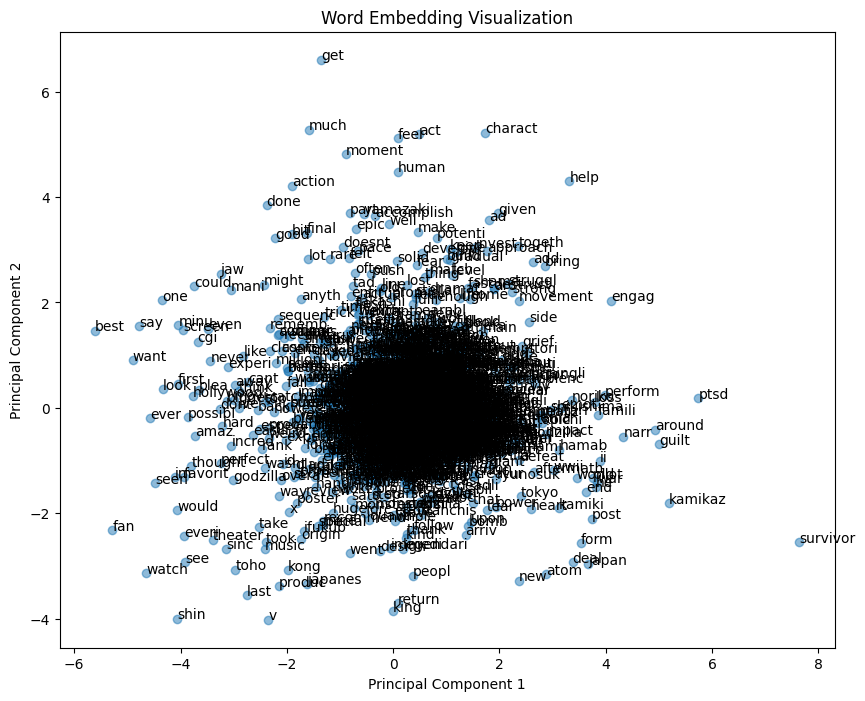

In [ ]:
from gensim.models import Word2Vec as GensimWord2Vec
from sklearn.decomposition import PCA as SklearnPCA
import matplotlib.pyplot as plt

# Load the trained Word2Vec model
gensim_word2vec_model = GensimWord2Vec.load('word2vec_model.bin')

# Get the vocabulary and vectors
vocabulary = list(gensim_word2vec_model.wv.index_to_key)
word_vectors = gensim_word2vec_model.wv[vocabulary]

# Perform PCA to reduce dimensionality to 2
sklearn_pca = SklearnPCA(n_components=2)
pca_result = sklearn_pca.fit_transform(word_vectors)

# Plot the words in 2D space
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

# Annotate each point with its corresponding word
for index, word in enumerate(vocabulary):
    plt.annotate(word, xy=(pca_result[index, 0], pca_result[index, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Word Embedding Visualization')
plt.show()



## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link:
https://github.com/RichardRajesh/5731-Computational-methods/blob/main/modified_cleaned_movie_reviews.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer

The assignment is very challenging and i loved working the dataset i have created previously on my own. I found it challenging while wring the code from scratch as in my previous works its little easy as we are using the inbuilt libraries, but now its different and complex too. The parts that i loved are the learning process in each question when i am trying to know the actual concept behind finding the n-grams, or how does tokenisation works etc., The time provided is however little less i believe as in this assignment i had lot to learn and there is more background theory to understand the working of techniques, hence i believe there could be more time so as to deeply enjoy the learning process.